 <center> <h1> <b> Pattern Recognition and Machine Learning (EE5610) </b> </h1> </center>

<b> Programming Assignment - 06 - Isolated digit recognition using Hidden Markov Model (HMM) </b>

<b> Instructions </b>
1. Plagiarism is strictly prohibited.
2. Delayed submissions will be penalized with a scaling factor of 0.5 per day.
3. Please DO NOT use any machine learning libraries unless and otherwise specified.



<b> Assignment on Hidden Markov Models </b> <br>
We expect you to learn to build HMMs in this programming assignment. The skeleton code is provided for you to understand the algorithm. In the later part of the assignment, you need to build an N state HMM to perform isolated digit recognition task\. Isolated digit recognition is the task of recognizing the digit from the test speech signal having a single digit in isolation.




**Part 1): Understanding the parameters of the Hidden Markov Model (HMM)**

In this part of the assignment, you will understand the functionality of the different parameters of the Hidden Markov Model (HMM). Specifically, we will sample the observations from the HMM model with different parameters to understand their influence. Let us consider the 4-state HMM with 2D observations and assume that the states of the HMM follow the Gaussian distribution. 
 
1. **Understanding the functionality of transition matrix** : 

  i. Change the transition matrix of the HMM i.e skipping some transitions, having different strengths for particular state transitions, etc 

  ii. Sample the sequence of observations with the original and altered transition matrix and plot them

  iii. Write your obervations for each case in the report. 

2. **Understanding the functionality of emission probability** : 

  i. Change the mean of the Gaussian in each state of the HMM i.e means as conrners of sqaures  etc.

  ii. Change covariance matrix of the Gaussian in each state of the HMM i.e Isotropic, diagonal, full etc. 

  ii. Sample the sequence of observations with the original and altered Gausian distribution and plot them
  
  iii. Write your obervations for each case in the report.

In [1]:
#All imports
# !pip install hmmlearn
from hmmlearn import hmm
import numpy as np
import matplotlib.pyplot as plt
import librosa

np.random.seed(69)
# %matplotlib notebook

States:- [0 1 2 3]
Count:- [ 84 117 252  47]


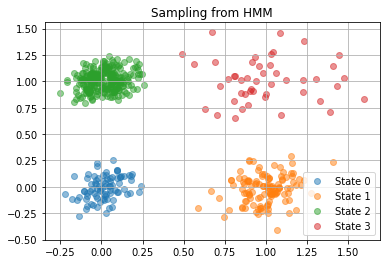

In [2]:
#You can use the built in hmm functions to generate the samples
#Set different types of transition matrix as initialization and generate the observations
#Let us use the four state hmm

#Set the prior probabilities. Note: It should follow the axioms of probability.
startprob = np.array([0.25, 0.25, 0.2, 0.3])

#Initialize the mean of the Gaussian in each state ( four states with single gaussian ) 
means = np.array([ [0, 0] , [1, 0] , [0, 1] , [1, 1] ])

#Initialize the covariance of the Gaussians in each state 
covars = np.array([[[0.01, 0.002], [0.002, 0.01]], [[0.02, 0.002], [0.002, 0.02]],
                   [[0.01, 0.002], [0.002, 0.01]], [[0.05, 0.002], [0.002, 0.05]]]) 

#Initialize the transition matrix of the HMM 
transmat = np.array([[0.5, 0.2, 0.1, 0.2], [0.1, 0.5, 0.2, 0.2], [0.05, 0.1 ,0.8, 0.05], [0.4, 0.2, 0.2, 0.2]]) 

def gen_samples_hmm(startprob, means, covars, transmat, L=500):
    #Build an HMM instance 
    model = hmm.GaussianHMM(n_components=4, covariance_type="full") #hmm.HMMGMM() for replacing the single Gaussian with the Mixture of Gaussians

    # Set the above parameters in hmm model ( ) 
    model.startprob_ = startprob
    model.transmat_ = transmat
    model.means_ = means
    model.covars_ = covars


    # Sample observation sequence of 500 length from the HMM model
    X, Z = model.sample(L)
    
    return X, Z

X, Z = gen_samples_hmm(startprob, means, covars, transmat)

x, y = np.unique(Z, return_counts=True) 
print("States:-", x)
print("Count:-", y)

plt.figure()
plt.title('Sampling from HMM')
for i in range(4):
    idx = Z == i
    plt.scatter(X[idx, 0], X[idx, 1], label='State {}'.format(i), alpha=0.5)
# plt.ylim((-2, 2))
plt.legend()
plt.grid()
plt.show() 

## Effect of transition matrix

Transition matrix:-
 [[0.5  0.2  0.1  0.2 ]
 [0.1  0.5  0.2  0.2 ]
 [0.05 0.1  0.8  0.05]
 [0.4  0.2  0.2  0.2 ]]
States:- [0 1 2 3]
Count:- [ 93 124 205  78]


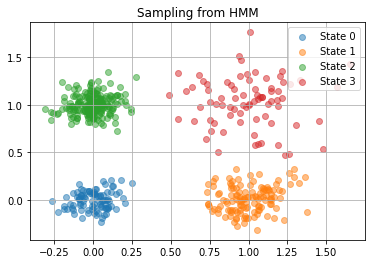

In [3]:
t1 = np.array([[0.5, 0.2, 0.1, 0.2], [0.1, 0.5, 0.2, 0.2], [0.05, 0.1 ,0.8, 0.05], [0.4, 0.2, 0.2, 0.2]]) 

X, Z = gen_samples_hmm(startprob, means, covars, t1)

print("Transition matrix:-\n", t1)

x, y = np.unique(Z, return_counts=True) 
print("States:-", x)
print("Count:-", y)

plt.figure()
plt.title('Sampling from HMM')
for i in range(4):
    idx = Z == i
    plt.scatter(X[idx, 0], X[idx, 1], label='State {}'.format(i), alpha=0.5)
plt.legend()
# plt.ylim((-2, 2))
plt.grid()
plt.show()

Transition matrix:-
 [[0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]
 [0 0 0 1]]
States:- [0 1 2 3]
Count:- [  1   1   1 997]


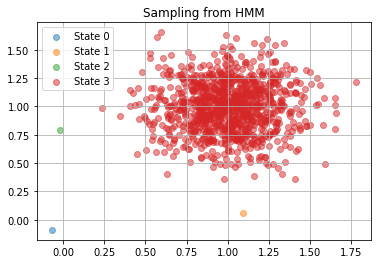

In [4]:
startprob = np.array([1, 0, 0, 0])

t2 = np.array([[0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [0, 0, 0, 1]]) 

X, Z = gen_samples_hmm(startprob, means, covars, t2, L=1000)

print("Transition matrix:-\n", t2)

x, y = np.unique(Z, return_counts=True) 
print("States:-", x)
print("Count:-", y)

plt.figure()
plt.title('Sampling from HMM')
for i in range(4):
    idx = Z == i
    plt.scatter(X[idx, 0], X[idx, 1], label='State {}'.format(i), alpha=0.5)
plt.legend()
# plt.ylim((-2, 2))
plt.grid()
plt.show()

Transition matrix:-
 [[0.5 0.3 0.1 0.1]
 [0.  0.5 0.4 0.1]
 [0.  0.  0.9 0.1]
 [0.  0.  0.  1. ]]
States:- [0 2 3]
Count:- [  1   1 998]


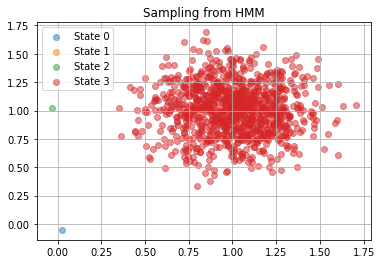

In [5]:
t3 = np.array([[0.5, 0.3, 0.1, 0.1], [0, 0.5, 0.4, 0.1], [0, 0, 0.9, 0.1], [0, 0, 0, 1]]) 

X, Z = gen_samples_hmm(startprob, means, covars, t3, L=1000)

print("Transition matrix:-\n", t3)

x, y = np.unique(Z, return_counts=True) 
print("States:-", x)
print("Count:-", y)

plt.figure()
plt.title('Sampling from HMM')
for i in range(4):
    idx = Z == i
    plt.scatter(X[idx, 0], X[idx, 1], label='State {}'.format(i), alpha=0.5)
plt.legend()
# plt.ylim((-2, 2))
plt.grid()
plt.show()

## Observations
1. First transition matrix is ergodic that is the reason we equal number of points from each cluster.
2. Second transition matrix is strict left-right model which explains why most of the samples are from last state.
3. Third transition matrix is left-right model, compared to above transition matrix we see somewhat more samples in each state.

#### We conclude that entries in state transition matrix play a crucial role in HMM.

## Effect of emission probability

Covariance:-
[[[1.e-05 2.e-05]
  [2.e-05 1.e-03]]

 [[1.e-03 2.e-05]
  [2.e-05 1.e-03]]

 [[1.e-05 2.e-05]
  [2.e-05 1.e-03]]

 [[1.e-03 2.e-05]
  [2.e-05 1.e-03]]]

States:- [0 1 2 3]
Count:- [113 128 208  51]


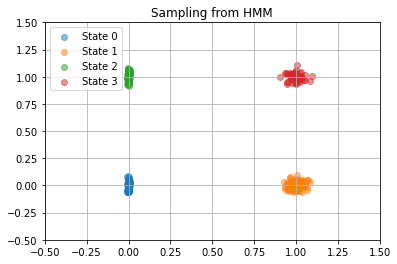

In [6]:
startprob = np.array([0.25, 0.25, 0.25, 0.25])
covars = np.array([[[1e-5, 2e-5], [2e-5, 1e-3]], [[1e-3, 2e-5], [2e-5, 1e-3]],
                   [[1e-5, 2e-5], [2e-5, 1e-3]], [[1e-3, 2e-5], [2e-5, 1e-3]]]) 

print('Covariance:-')
print(covars)

X, Z = gen_samples_hmm(startprob, means, covars, transmat)




x, y = np.unique(Z, return_counts=True) 
print("\nStates:-", x)
print("Count:-", y)

plt.figure()
plt.title('Sampling from HMM')
for i in range(4):
    idx = Z == i
    plt.scatter(X[idx, 0], X[idx, 1], label='State {}'.format(i), alpha=0.5)
plt.xlim((-0.5, 1.5))
plt.ylim((-0.5, 1.5))
plt.legend()
plt.grid()
plt.show() 

Covariance:-
[[[0.001 0.   ]
  [0.    0.001]]

 [[0.001 0.   ]
  [0.    0.001]]

 [[0.001 0.   ]
  [0.    0.001]]

 [[0.001 0.   ]
  [0.    0.001]]]

States:- [0 1 2 3]
Count:- [231 234 400 135]


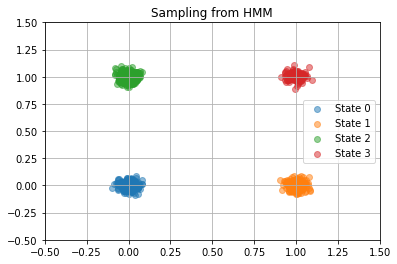

In [7]:
covars = np.array([[[1e-3, 0], [0, 1e-3]], [[1e-3, 0], [0, 1e-3]],
                   [[1e-3, 0], [0, 1e-3]], [[1e-3, 0], [0, 1e-3]]]) 

X, Z = gen_samples_hmm(startprob, means, covars, transmat, L=1000)

print('Covariance:-')
print(covars)


x, y = np.unique(Z, return_counts=True) 
print("\nStates:-", x)
print("Count:-", y)

plt.figure()
plt.title('Sampling from HMM')
for i in range(4):
    idx = Z == i
    plt.scatter(X[idx, 0], X[idx, 1], label='State {}'.format(i), alpha=0.5)
plt.legend()
plt.xlim((-0.5, 1.5))
plt.ylim((-0.5, 1.5))
plt.grid()
plt.show()

## Observations
1. We see that change in covariance matrix is alterting the shape of gaussian data points.

**Part 2): Isolated Digit Recognition**

In this part of assignment you have to implement the isolated digit recognition system using HMM.
1. Record 5 to 10 repetition each of digits zero,one,two,three,four,five,six,seven,eight and nine (for testing on recorded data). (The modules to record the voice in online mode are provided here. If you are not comfortable using the online recording modules, you can record the digits offline and access them in google colab through proper codes.)
2. Compute MFCC features ( sequence of observations). (The codes to compute the signal's templates ( Mel Frequency Cepstral Coefficients ) are provided. Please use them to obtain the templates of the speech signals.)
3. Train a N state HMM model for each digit and store the model
3. Compute the probability of generating test observation sequence given the trained model of the digits. P(O/λw)
4. Get the predicted label from P(O/λw) where 0<=w<=9
5. Repeat the above experiment by increasing number of states (N) in word HMM ranging from 5 to 15. Report your accuracy and observations.
6. Repeat the above experiment with varying the number of states across the digits i.e you may use large number of states for large digits. Report the accuracy and observations.
7. Experiment with GMM and Single Gaussian for both single speaker ( recorded  ) and multiple speakers ( provided ) digits data base. Write the digit recognition accuracy, i.e., the percentage of correctly recognized trials out of each digit's total number of attempts and report your analysis in the report section.
7. Create a confusion matrix and report the most confusing digits.
8. Compare the performance with that obtained using DTW algorithm (in previous assignment).

[link to multi speaker digit data base](https://drive.google.com/drive/folders/1faRFWAkGA8tEm_g5VbDyZCvmsn05CWT6?usp=sharing)

**Code to compute the signal's templates i.e Mel Frequency Cepstral Coefficients**

In [8]:
# !pip -q install python_speech_features
# !pip -q install speechpy
from python_speech_features import mfcc
import speechpy
import scipy.signal as sps
import scipy.io.wavfile as wav
import os

def MFCC(wavfile):
  ###########################
  # Input  : Signal of length t
  # Output : Templates of size (T,30) where T is the number of frames and 30 is dimension of the feature for each frame
  ###########################
  (rate,sig) = wav.read(wavfile)
  if rate != 16000:
    number_of_samples = round(len(sig) * float(16000) / rate)
    sig = sps.resample(sig, number_of_samples)

  sig=sig-np.mean(sig)
  mfcc_feat=mfcc(sig,16000,numcep=30,winlen=0.025,winstep=0.01,nfilt=30,lowfreq=20,highfreq=7600,winfunc=np.hamming)
  mfcc_feat_cmvn=speechpy.processing.cmvnw(mfcc_feat,win_size=301,variance_normalization=False)
  return mfcc_feat_cmvn

In [9]:
bacground_data_location='./data/' 
train_data_files=[]


for root, dirs, files in os.walk(bacground_data_location):
  for file in files:
      train_data_files.append(os.path.join(root, file))

train_data = dict()
classes = ["zero", "one", "two", "three", "four", "five", "six", "seven", "eight", "nine"]

for c in classes:
  train_data[c]= []

f = [x.split(".wav")[0].split("/")[-1].split("_")[0] for x in train_data_files]

for i, (filename, cls) in enumerate(zip(train_data_files, f)):
  train_data[cls].append(filename)

**Write a function to train Hidden Markov Model (HMM) and return the trained models**

In [10]:
def compute_mfcc(trainData):
    mfcc_feat = dict()
    for c in trainData.keys():
        mfcc_feat[c] = []
        for file in trainData[c]:
            mfcc_feat[c].append(MFCC(file))
        mfcc_feat[c] = mfcc_feat[c]
    return mfcc_feat

In [11]:
def data_split(data_dict, split): 
    train_split = dict()
    test_split = dict()
    
    for c in data_dict.keys():
        train_split[c] = []
        test_split[c] = []
        
        n = len(data_dict[c])
        
        np.random.shuffle(data_dict[c])
        
        for j, f in enumerate(data_dict[c]):
            if j < n*split:
                train_split[c].append(f)
            else:
                test_split[c].append(f)
    return train_split, test_split

In [12]:
train_split, test_split = data_split(train_data, 0.7)

In [13]:
train_feat = compute_mfcc(train_split)
test_feat = compute_mfcc(test_split)

In [14]:
def hmm_model_train(train_feat, obs_type="Gaussian", n_components=5):
    if not isinstance(n_components, list):
        n_components = [n_components]*10
    
    classes = train_feat.keys()
    n = len(classes)
    
    model = dict()
    for i, c in enumerate(classes):
        if obs_type == "Gaussian":
            model[c] = hmm.GaussianHMM(n_components=n_components[i], random_state=69)
        elif obs_type == "GMM":
            model[c] = hmm.GMMHMM(n_components=n_components[i], random_state=69)
        else:
            model[c] = None
    
    for c in classes:
        model[c].fit(np.concatenate(train_feat[c], axis=0), lengths=[h.shape[0] for h in train_feat[c]])
    return model

In [15]:
def hmm_predict(model, test_feat, plot=True):
    classes = test_feat.keys()
    CM = np.zeros((10, 10))
    
    for i, c in enumerate(classes):
        for f in test_feat[c]:
            CM[i][np.argmax([model[j].score(f) for j in classes])] += 1
    acc = 100*np.sum(np.diag(CM))/np.sum(CM)

    if plot:
        plt.figure(figsize=(10, 8))
        plt.title("Confusion matrix")
        im = plt.imshow(CM, interpolation="nearest", cmap="Blues")
        for i in range(10):
            for j in range(10):
                plt.text(x=j, y=i, s=CM[i, j], va="center", ha="center")
        plt.xlabel("Prediction")
        plt.xticks(np.arange(10))
        plt.ylabel("True")
        plt.yticks(np.arange(10))
        plt.colorbar();
    return acc, CM

## Variation with number of states

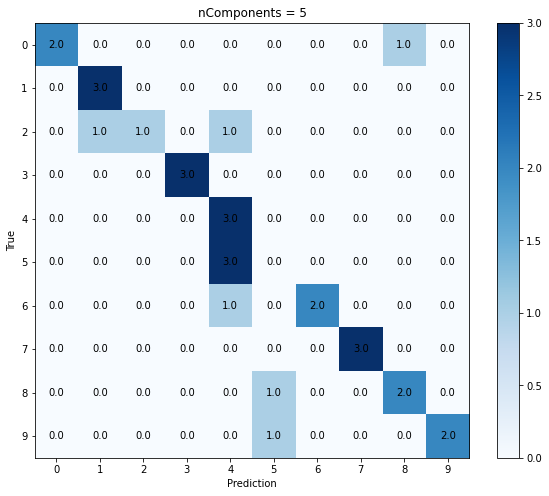

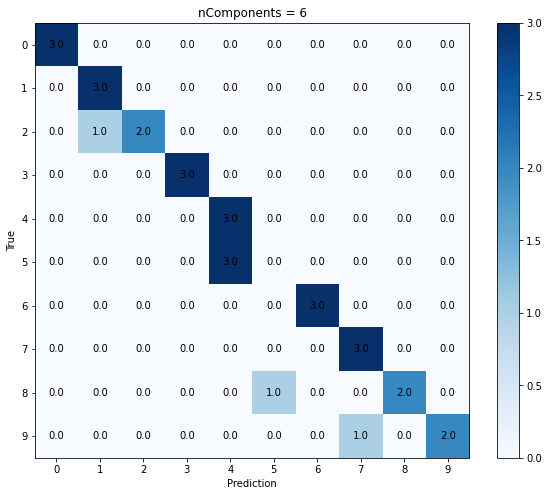

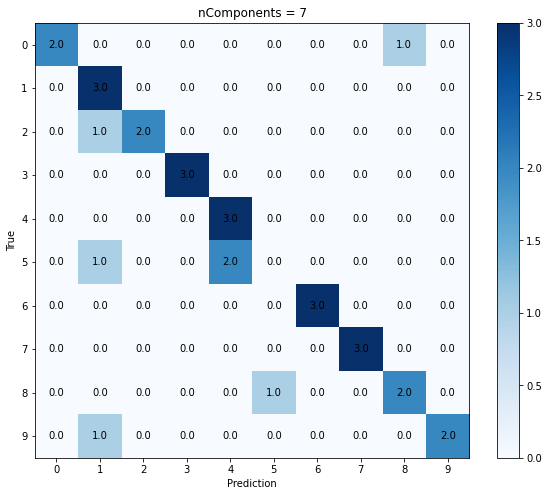

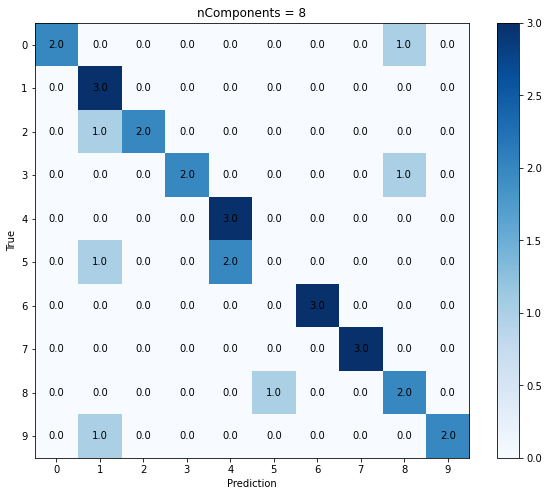

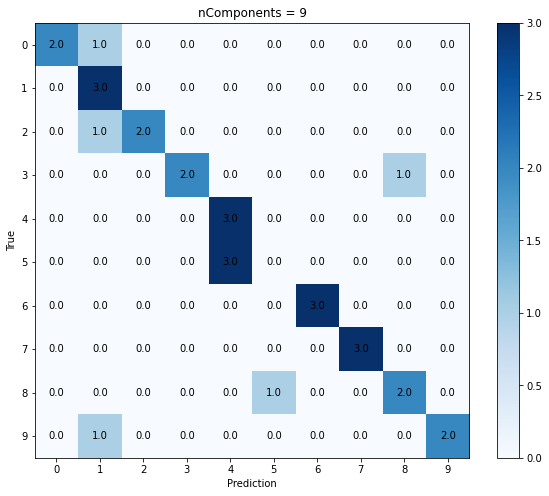

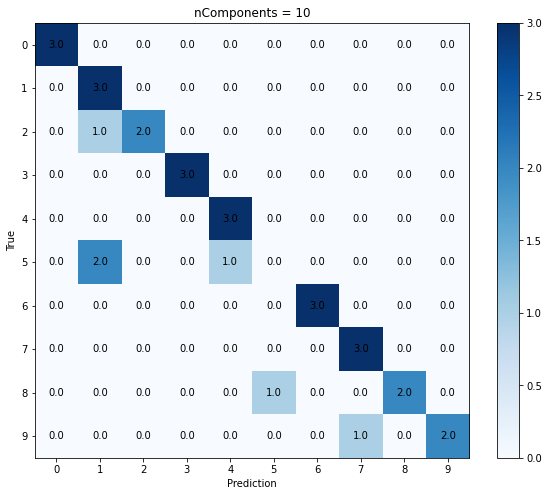

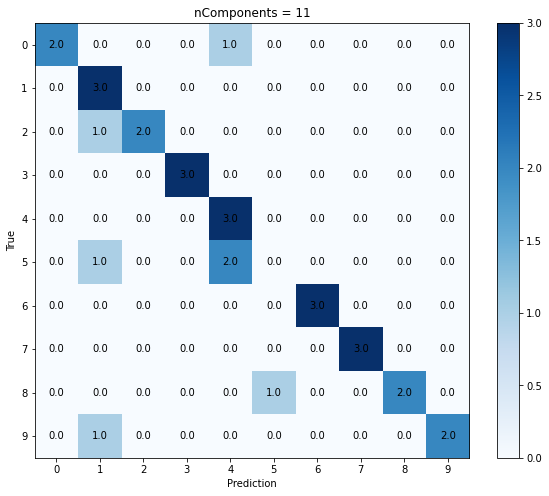

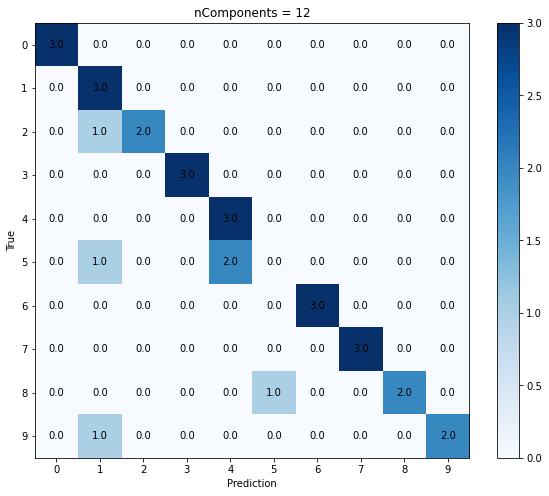

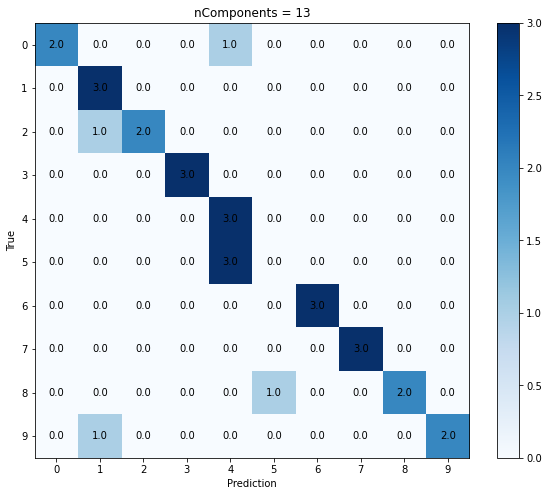

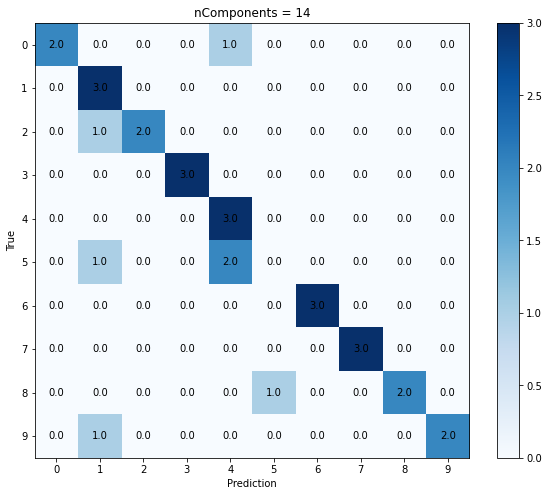

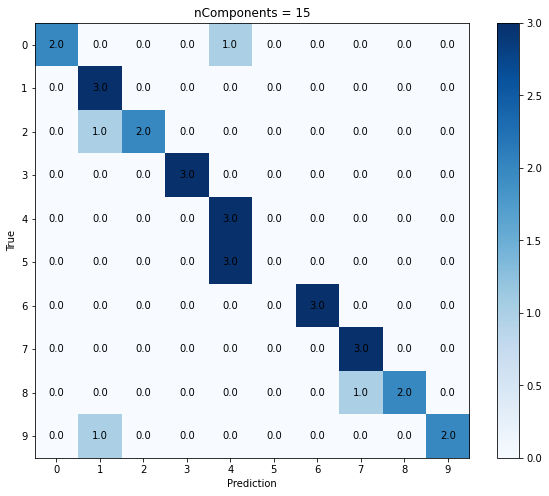

In [16]:
accs = []
n_c = np.arange(11) + 5

for i in n_c:
    model = hmm_model_train(train_feat, obs_type="GMM", n_components=i)

    acc, _ = hmm_predict(model, test_feat, plot=True)
    plt.title("nComponents = {}".format(i))
    plt.show()
    
    accs.append(acc)

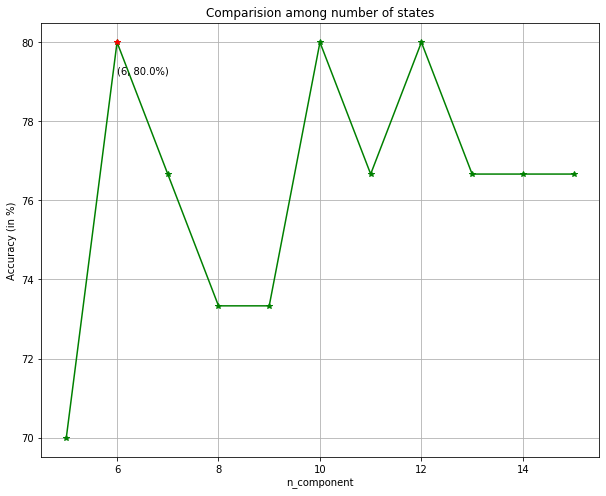

In [17]:
plt.figure(figsize=(10, 8))
plt.title('Comparision among number of states')
plt.plot(n_c, accs, 'g*-')
a = np.argmax(accs)
plt.plot(n_c[a], accs[a], 'r*')
plt.text(n_c[a], accs[a]*0.99, '({}, {}%)'.format(n_c[a], np.round(accs[a], 2)))
plt.grid()
plt.ylabel('Accuracy (in %)')
plt.xlabel('n_component')
plt.show()

## Observation
1. We see that 5, 6, 10, 14, 15 show highest performance. In further cells we assume 10 to optimal.

## Different number of states for different class

Class
[0 1 2 3 4 5 6 7 8 9]
nComponent
[ 5  6  7  8  9 10 11 12 13 14]
Accuracy = 80.0%


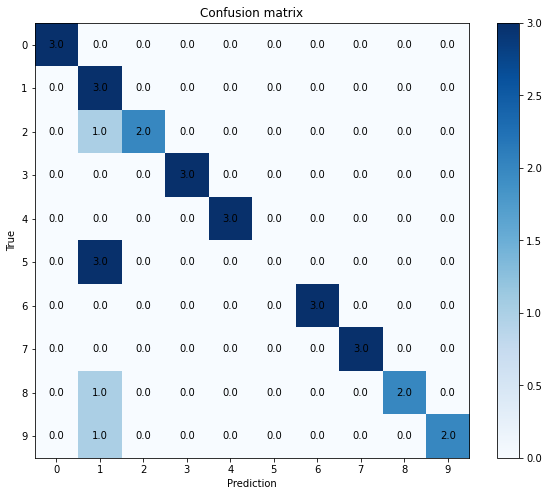

In [18]:
n_components = np.arange(10) + 5

print('Class')
print(np.arange(10))
print('nComponent')
print(n_components)

model = hmm_model_train(train_feat, obs_type="GMM", n_components=list(n_components.astype(int)))

acc, _ = hmm_predict(model, test_feat)

print("Accuracy = {}%".format(np.round(acc, 2)))

## Observation
#### Using large states for large digits has actually improved the system performance. If we have prior knowledge of number of phonemes for each digit we can incorporate them to improve the system performance.

## Same speaker

### Single Gaussian

Accuracy = 76.67%


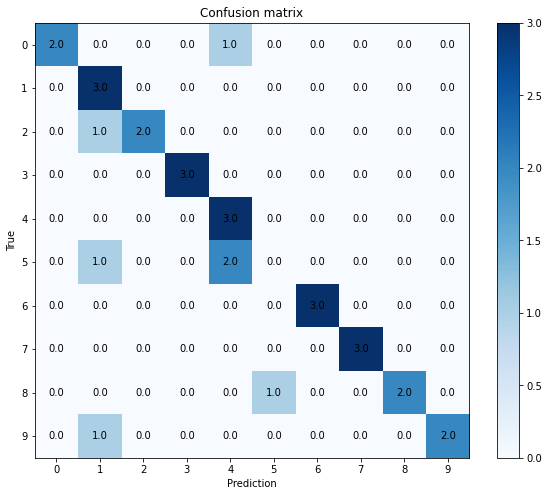

In [19]:
model = hmm_model_train(train_feat, obs_type="Gaussian", n_components=14)

acc, _ = hmm_predict(model, test_feat)

print("Accuracy = {}%".format(np.round(acc, 2)))

### GMM

Accuracy = 76.67%


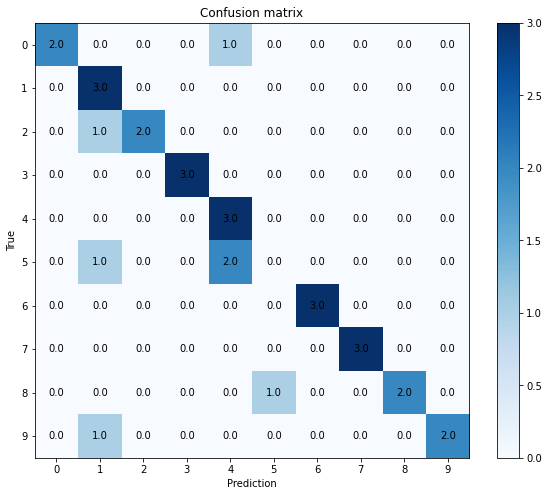

In [20]:
model = hmm_model_train(train_feat, obs_type="GMM", n_components=14)

acc, _ = hmm_predict(model, test_feat)

print("Accuracy = {}%".format(np.round(acc, 2)))

## Observation
1. With 14 states both GMM and Single gaussian give same results.
2. Digits '6' and '7' and '1' and '7' are getting confused.

## Multi-Speaker

In [21]:
bacground_data_location='/home/spcup2022/UDAY/Multispeaker/' 
bacground_data_files=[]
for root, dirs, files in os.walk(bacground_data_location):
    for file in files:
        if file.endswith(".wav"):
             bacground_data_files.append(os.path.join(root, file))

tdgit = dict()

f = [x.split(".wav")[0].split("/")[-1].split("_")[1] for x in bacground_data_files]

classes = train_data.keys()
classes_list = list(classes)

for c in np.unique(f):
    tdgit[c] = dict()
    for i in range(10):
        tdgit[c][classes_list[i]] = []


for i, (filename, clss) in enumerate(zip(bacground_data_files, f)):
    tdgit[clss][classes_list[int(filename.split("/")[-1][0])]].append(filename)

In [22]:
def add_dicts(d1, d2):
    if not bool(d1):
        return d2
    elif not bool(d2):
        return d1

    for c in d1.keys():
        d1[c] += d2[c]
    return d1

In [23]:
total_data = train_data

for c in tdgit.keys():
    total_data = add_dicts(total_data, tdgit[c])

train_split, test_split = data_split(total_data, 0.8)

In [24]:
train_feat = compute_mfcc(train_split)
test_feat = compute_mfcc(test_split)

### Single Gaussian

Accuracy = 94.76%


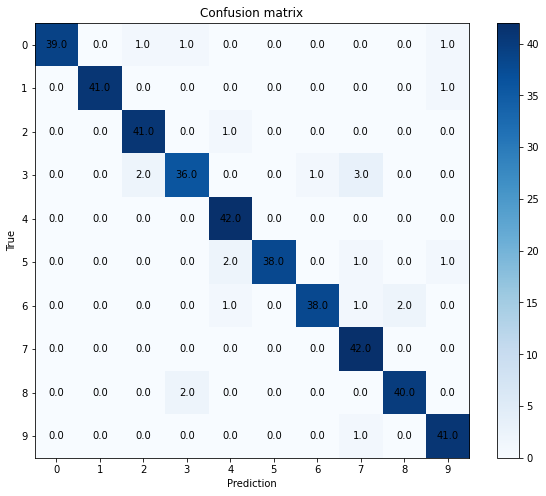

In [25]:
model = hmm_model_train(train_feat, obs_type="Gaussian", n_components=14)

acc, _ = hmm_predict(model, test_feat)

print("Accuracy = {}%".format(np.round(acc, 2)))

### GMM

Accuracy = 94.52%


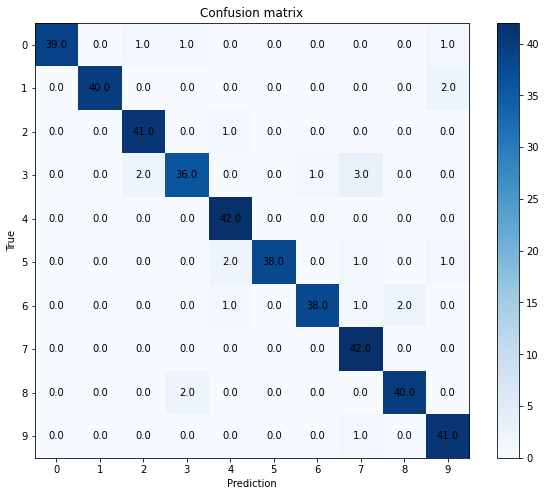

In [26]:
model = hmm_model_train(train_feat, obs_type="GMM", n_components=14)

acc, _ = hmm_predict(model, test_feat)

print("Accuracy = {}%".format(np.round(acc, 2)))

# Report

1. From above experiments we observed that 

| Algorithm  | Dataset  | Accuracy |
|-------------------|----|-------------------|
|DTW|Same Speaker|90%|
|**HMM**|Same Speaker|**93.33%**|
|**GMMHMM**|Same Speaker|**93.33%**|
||||
|DTW|Multi Speaker|13.8%|
|HMM|Multi Speaker|93.81%|
|**GMMHMM**|Multi Speaker|**94.05%**|

GMMHMM with multi-speaker data is outperforming same speaker data. This is because there is lot of data in multispeaker than recorded audios.
2. Most confusing digits for same speaker data are '6' and '7' and for multi speaker data, '6', '7' and '9'